In [1]:
from helpers import * 

In [2]:
s3=s3_connection("aayrapetyan")
df=s3.get_tables_from_s3("aayrapetyan/diffusion/final_table.parquet")
df.sample(3)

connection successful


,total_voyageurs_2022,nom_gare,uic,codeinsee,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,pbac2022,psup2022,dist_closest_station_km,nb_stations_same_commune,regions
1476,17798,Marvejols,87783282,48092,3.281072,44.544682,48092,MARVEJOLS,4477.0,18252.9490,0.481524,0.300739,4.6,1,Occitanie
218,710,La Levade,87775247,30132,4.010274,44.228602,30132,GRAND-COMBE,4884.0,8132.2124,0.237562,0.078145,2.8,2,Occitanie
2113,1053068,Saint-Agne,87611301,31555,1.450209,43.579674,31555,TOULOUSE,509194.0,17840.4800,0.711291,0.565267,2.5,11,Occitanie


In [3]:

aggregated_stats=calculate(df,group=["regions"],fields=["total_voyageurs_2022","pop2022"],stats=["sum","sum"],names=["sum_voy_region","sum_pop_region"])
df=df.merge(aggregated_stats,on="regions",how="inner")

In [4]:
df.sample(1)

,total_voyageurs_2022,nom_gare,uic,codeinsee,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,pbac2022,psup2022,dist_closest_station_km,nb_stations_same_commune,regions,sum_voy_region,sum_pop_region
2792,53041,Villiers Montbarbin,87116749,77142,2.883042,48.863254,77142,CRECY-LA-CHAPELLE,4515.0,23960.699,0.548908,0.319721,1.7,2,Île-de-France,1411907509,12326097.0


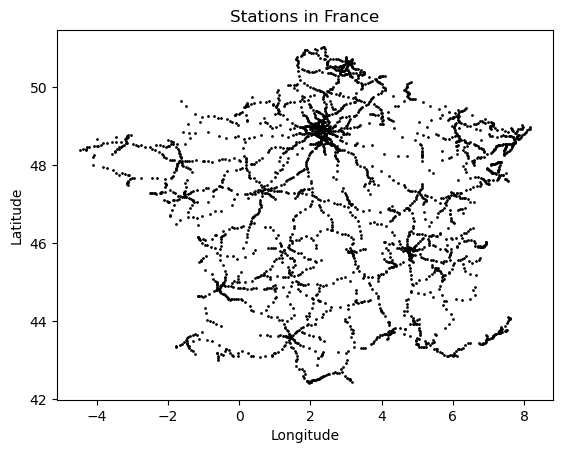

In [5]:
simple_plot_map(lat=df["lat_gare"],lon=df["lon_gare"])

nb removed observations :  18


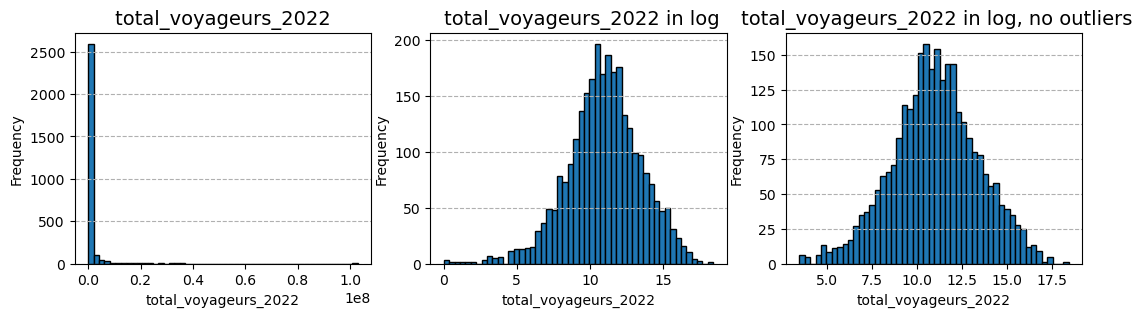

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))  # 3 rows, 1 column of plots
no_outliers_table=delete_outliers_z_score(df,np.log(df["total_voyageurs_2022"]))
plot_hist(axs[0], df['total_voyageurs_2022'], title_suffix="")
plot_hist(axs[1], np.log(df['total_voyageurs_2022']), title_suffix="in log")
plot_hist(axs[2], np.log(no_outliers_table['total_voyageurs_2022']), title_suffix="in log, no outliers")

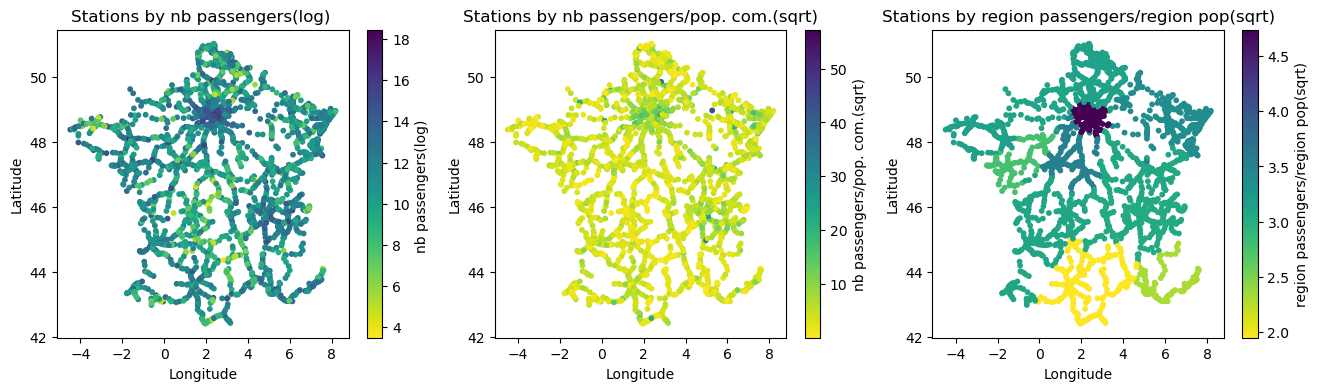

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))  # 2 rows, 1 column of plots
suffix_description1="nb passengers(log) "
suffix_description2="nb passengers/pop. com.(sqrt)"
suffix_description3="region passengers/region pop(sqrt)"
plot_map_with_legend(axs[0], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.log(no_outliers_table['total_voyageurs_2022']),suffix_description=suffix_description1)
plot_map_with_legend(axs[1], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.sqrt(no_outliers_table['total_voyageurs_2022'] / no_outliers_table["pop2022"]),suffix_description=suffix_description2)
plot_map_with_legend(axs[2], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.log(no_outliers_table['sum_voy_region'] / no_outliers_table["sum_pop_region"]),suffix_description=suffix_description3)